## Business Undestanding


### Bestimmung der Problemstellung: 
Hier wird an den Anwender die Anforderung gestellt, das Data Mining Projekt betriebswirtschaftlich auszurichten. Dabei werden die operationalen und betriebswirtschaftlichen Zielkriterien formuliert.
>Bei der vorliegenden Projektaufgabe gilt es, drei Prognosemodelle zu erstellen, um auf Basis der vorliegenden Daten zu den Brunnen bestimmen zu können, welche der gegebenen Brunnen funktionieren, welche nicht und welche repariert werden müssen. Dabei soll anhand der ML-Pipeline, das heißt dem CRISP-DM Modell vorgegangen werden und die Güte der einzelnen Modelle anhand der AUC auf den Testdaten qualifiziert werden. 



### Situationsbewertung: 
Durch die Situationsbewertung werden vorhandene Software- sowie Personalressourcen, die für das Data Mining-Projekt zur Verfügung stehen, bestimmt. Zudem sind mögliche Risiken, die während des Data Mining-Projektes auftreten können, aufzuführen.
>Bewertung

### Bestimmung analytischer Ziele:
Ausgehend von der zuvor bestimmten betriebswirtschaftlichen Problemdefinition (z.B. zielgerichtete Ansprache der Kunden) müssen dazu die erforderlichen Datenanalyseaufgaben (z.B. Kundensegmentierung, Scoring-Verfahren zur Kampagnenoptimierung etc.) ermittelt werden. Zudem müssen die Erfolgskriterien für das Data Mining-Projekt bestimmt werden (z.B. Steigerung der Responsequote von Kampagnen um 3% bei weniger Ressourceneinsatz, Ansprache des Kunden nach Verhaltensmustern etc.).
>Ziele


### Erstellung des Projektplans: 
Der Projektplan beschreibt die beabsichtigten Ziele des Data Mining-Projektes, dazu gehört:
Auflistung der einzelnen Schritte mit Zeitspanne
Beurteilung möglicher Risiken (Verzögerungen, Ursachen für ein Scheitern des Projektes etc.)
Prüfung der zur Verfügung stehenden Ressourcen (wie Mitarbeiter ; Hardware; Software z.B. Data Warehouse, Data Mining-Werkzeuge; Datenbestand)
>Plan

## Data Understanding


### Daten sammeln: 
Hier werden die benötigten Daten für die Analyse beschaffen und, wenn erforderlich, in bereits bestehende Datenmengen integriert. Der Analyst sollte Probleme, die bei der Datenbeschaffung auftreten, stets dokumentieren, um mögliche Diskrepanzen bei einem Folgeprojekt in der Zukunft zu vermeiden.
>amount_tsh - Total static head (amount water available to waterpoint)

>date_recorded - The date the row was entered

>funder - Who funded the well

>gps_height - Altitude of the well

>installer - Organization that installed the well

>longitude - GPS coordinate

>latitude - GPS coordinate 

>Ywpt_name - Name of the waterpoint if there is one

>num_private -

>basin - Geographic water basin

>subvillage - Geographic location

>region - Geographic location

>region_code - Geographic location (coded)

>district_code - Geographic location (coded)

>lga - Geographic location

>ward - Geographic location

>population - Population around the well

>public_meeting - True/False

>recorded_by - Group entering this row of data

>scheme_management - Who operates the waterpoint

>scheme_name - Who operates the waterpoint

>permit - If the waterpoint is permitted

>construction_year - Year the waterpoint was constructed

>extraction_type - The kind of extraction the waterpoint uses

>extraction_type_group - The kind of extraction the waterpoint uses

>extraction_type_class - The kind of extraction the waterpoint uses

>management - How the waterpoint is managed

>management_group - How the waterpoint is managed

>payment - What the water costs

>payment_type - What the water costs

>water_quality - The quality of the water

>quality_group - The quality of the water

>quantity - The quantity of water

>quantity_group - The quantity of water

>source - The source of the water

>source_type - The source of the water

>source_class - The source of the water 


In [10]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
# Einlesen der vorliegenden Datensätze
train_data = pd.read_csv("pump_train.csv")
test_data = pd.read_csv("pump_test.csv")

### Daten beschreiben: 
In diesem Schritt gilt es, ein allgemeines Verständnis für die Daten zu erlangen. Zudem werden die Eigenschaften der Daten beschrieben, wie z.B. Quantität der Daten, Formateigenschaften, Anzahl der Einträge und Felder sowie Eigenschaften der Felder. Die entscheidende Frage die sich der Analyst stellen sollte ist, ob die vorliegenden Daten der Datenanalyse genügen um das Projekt erfolgreich abzuschließen.
>seperate Test- und Trainingsdatensätze

>Datentypen: float, int, object

>41 Spalten

>50490 Datensätze

>Dateigröße: 15.8+ MB

In [17]:
train_data.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [13]:
train_data.head(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,12237,30.0,2013-01-23,Government Of Tanzania,107,District Council,39.360880,-10.295705,Zahanati Membe,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe multiple,communal standpipe,functional
1,24566,0.0,2013-02-07,Private Individual,0,Edward,32.644074,-3.859265,Kwa Mama Wini,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,other,other,functional
2,20536,0.0,2011-07-15,Sawaka,0,DWE,30.999792,-1.721771,Kwasimon,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,non functional
3,30633,200.0,2011-03-25,Government Of Tanzania,2142,Commu,34.060324,-9.335288,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
4,2993,0.0,2011-02-17,African Muslim Agency,290,District Council,38.862874,-7.165410,Msikitini,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
5,41668,0.0,2013-02-15,Nyitamboka,1229,Nyitamboka,34.349079,-1.630274,Nyitamboka Kitanyita,0,...,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
6,61839,0.0,2013-02-09,Rwssp,0,DWE,32.586745,-3.815508,Idete,0,...,milky,milky,dry,dry,shallow well,shallow well,groundwater,other,other,non functional
7,62441,0.0,2011-02-21,Government Of Tanzania,75,Centr,39.010886,-7.615327,Nyambili Primary School 2,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
8,53492,0.0,2012-10-18,Member Of Perliament Ahmed Ali,0,Member of Perliament Ahmed Ali,33.165581,-3.796312,Kwa Hima Ganaye,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
9,54314,0.0,2011-08-01,The Desk And Chair Foundat,0,The desk and chair foundat,33.326639,-3.027799,Nguruko,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [14]:
# Verwenden verschiedener Funktionen, um den Datensatz an sich besser zu beschreiben
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50490 entries, 0 to 50489
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     50490 non-null  int64  
 1   amount_tsh             50490 non-null  float64
 2   date_recorded          50490 non-null  object 
 3   funder                 47396 non-null  object 
 4   gps_height             50490 non-null  int64  
 5   installer              47380 non-null  object 
 6   longitude              50490 non-null  float64
 7   latitude               50490 non-null  float64
 8   wpt_name               50490 non-null  object 
 9   num_private            50490 non-null  int64  
 10  basin                  50490 non-null  object 
 11  subvillage             50175 non-null  object 
 12  region                 50490 non-null  object 
 13  region_code            50490 non-null  int64  
 14  district_code          50490 non-null  int64  
 15  lg

In [16]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,50490.0,37113.857695,21447.241039,0.000000,18517.250000,37027.500000,55636.750000,7.424700e+04
amount_tsh,50490.0,319.158123,2987.517185,0.000000,0.000000,0.000000,20.000000,3.500000e+05
gps_height,50490.0,669.714280,693.123330,-90.000000,0.000000,371.000000,1322.000000,2.770000e+03
longitude,50490.0,34.078591,6.553382,0.000000,33.084409,34.906548,37.178899,4.034519e+01
latitude,50490.0,-5.708336,2.943806,-11.648378,-8.541643,-5.019807,-3.327550,-2.000000e-08
num_private,50490.0,0.459497,10.413455,0.000000,0.000000,0.000000,0.000000,1.402000e+03
region_code,50490.0,15.280511,17.550035,1.000000,5.000000,12.000000,17.000000,9.900000e+01
district_code,50490.0,5.641731,9.668596,0.000000,2.000000,3.000000,5.000000,8.000000e+01
population,50490.0,180.913389,479.854870,0.000000,0.000000,25.000000,215.750000,3.050000e+04
construction_year,50490.0,1301.724520,951.258506,0.000000,0.000000,1986.000000,2004.000000,2.013000e+03


In [7]:
train_data.shape 

(50490, 41)

=>

### Untersuchung der Daten: 
Zur Untersuchung der Daten werden erste Analysen mit den Daten betrieben. Hierzu werden Reports erstellt, um die ersten Erkenntnisse und Hypothesen zu visualisieren.
>erste Erkenntnisse/ Hypothesen

In [8]:
# Datensatz nach fehlenden Werten untersuchen
train_data.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3094
gps_height                   0
installer                 3110
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 315
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            2846
recorded_by                  0
scheme_management         3269
scheme_name              23942
permit                    2591
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

=> in den Spalten funder, installer, subvillage, public_meeting, scheme_management, scheme, name und permit existieren fehlende Werte. Diese fehlende Werte müssen in der Data Preparation später bereinigt bzw. aufgefüllt werden.

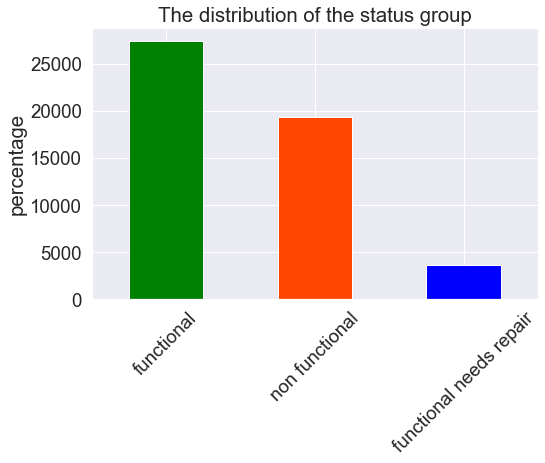

In [39]:
fig = plt.figure(figsize=(8,5))  
train_data.status_group.value_counts().plot(kind="bar", title="The distribution of the status group", ylabel="percentage", color=['green', 'orangered', 'blue'])
plt.xticks(rotation=45);

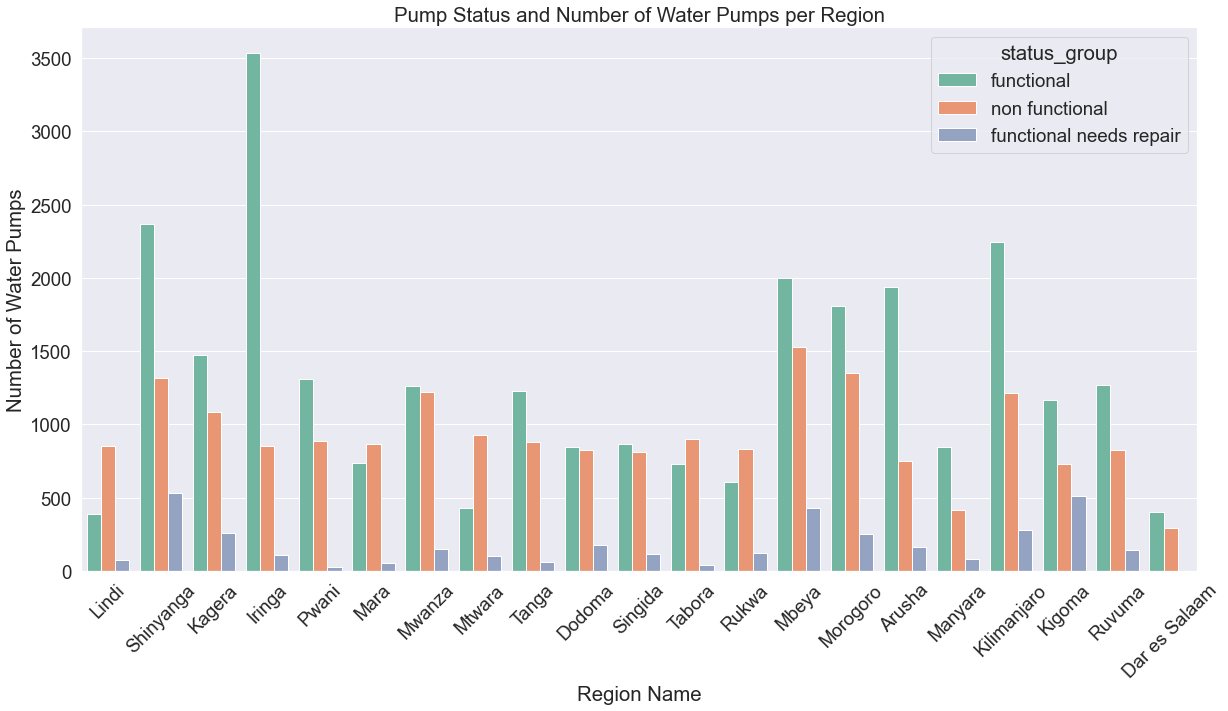

In [38]:
fig = plt.figure(figsize=(20,10))  
plot = sns.countplot(data=train_data, x='region', hue='status_group', palette="Set2")
plot.set(xlabel='Region Name', ylabel='Number of Water Pumps', title='Pump Status and Number of Water Pumps per Region')
plt.xticks(rotation=45);
# Quelle: https://github.com/dustiny5/Predictive_Modeling/blob/master/Water_Pump_Best%20-%20Final.ipynb

#### Region

Analysierte Spalten: gps_height, longitude, latitude, subvillage, region, region_code, district_code

In [12]:
px.scatter_geo(train_data.sample(1_000), lat="latitude", lon="longitude", color="status_group", scope="africa", opacity=0.7)

=> Aus der Karte lässt sich ablesen, dass es sich hauptsächlich um Brunnen in dem afrikanischen Land Tansania handelt.

### Bewertung der Daten: 
An diesem Punkt wird die Qualität des Datenbestandes bewertet. Es soll festgestellt werden, ob die Datenmenge für die Analyse ausreichend und verwendbar ist, wobei besonders auf fehlende Attributwerte zu achten ist.
>Bewertung der Daten

## Data Preperation

### Auswahl der Daten:
Die Auswahl der Daten für das Data Mining hängt stark von den Zielen ab, die man für das Data Mining-Projekt definiert. Hier spielen die Datenqualität und die technischen Gegebenheiten eine große Rolle. Es wird eine Selektion der Daten vorgenommen, wie z.B. eine Auswahl aller Kunden, die einen Umsatz von mehr als 100 Euro im Monat generieren. Am Ende dieses Prozesses sollte sich deutlich zeigen, welche Datenmengen(-Sets) in die Analyse aufgenommen werden oder ausgeschlossen werden.
>Auswahl der Daten

### Bereinigung der Daten: 
Ohne eine Bereinigung der Daten ist ein erfolgreiches Data Mining-Projekt fraglich. Es gilt eine saubere Datenmenge auszuwählen oder die Datenmenge muss bereinigt sein, um das gewünschte Ergebnis in der Modellierung zu erreichen.
>Bereinigung

### Transformation und Integration der Daten: 
Um die Daten in eine brauchbare Darstellungsform zu bringen, transformiert man die Daten. Die Transformation kodiert Daten und verändert deren Granularität durch Aggregation oder Disaggregation. Wichtige Kennzahlen, die für eine Analyse zu erstellen sind, könnten z.B. Umsatz pro Kunde, Deckungsbeitrag pro Kunde oder Umsatzanteil in Produktgruppe pro Kunde etc. sein.
>Transformation

### Format Data: 
In einigen Fällen muss für die Modellierung eine einfache Anpassung des Datenformates erfolgen, z.B. Anpassung des Datentyps.
>Anpassung der Daten

## Modeling

### Auswahl der Modellierungstechnik: 
Hier gilt es eine Modellierungstechnik auswählen, mit der man das Modell erstellt
>Aufzählung der möglichen Modelle

### Testmodell erstellen: 
Nach Auswahl des Modells wird ein Testmodell erstellt, um Qualität und Genauigkeit des Modells zu überprüfen. In überwachten Verfahren, wie der Klassifikation, ist es üblich, die Fehlerraten als Qualitätsmaß zu nutzen.
>Durchführung aller Modelle

### Bewertung des Modells: 
Hier ist das Modell nach der im Vorfeld definierten Data Mining-Zielsetzung zu bewerten. Des Weiteren gilt es die Data Mining-Ergebnisse in Bezug auf die betriebswirtschaftliche Fragestellung zu bewerten.
>Bewertung der Testmodelle, Auswahl des besten für die einzelnen drei Modelle

## Evaluation

### Bewerten der Resultate: 
In diesem Schritt bewertet man, inwieweit das Modell die Projektziele erreicht. Wenn die Ziele nicht erreicht sind, ist aufzuführen, aus welchen Gründen.
>RUC,...Bewerten

### Bewertung des Prozesses: 
Das Data Mining-Projekt wird rückblickend bewertet. Es wird festgestellt, ob alle wichtigen Faktoren betrachtet wurden und inwieweit die Attribute für zukünftige Data Mining-Projekte zu nutzen sind.
>Analyse, Bewertung

### Nächste Schritte festlegen: 
In diesem Schritt entscheidet der Projektleiter, ob das Projekt beendet ist und eingeführt wird.
>Ausblick geben

## Deployment

Die Deployment-Phase bildet in der Regel die Endphase eines Data Mining-Projektes. Hier werden die gewonnenen Erkenntnisse so geordnet und präsentiert, sodass für den Auftraggeber die Möglichkeit besteht dieses Wissen zu nutzen. Dazu gehört eine eventuelle Implementierungsstrategie, die Überwachung der Gültigkeit der Modelle, ein zusammenfassender Bericht und eine Präsentation.
>Fazit

CRISP-DM Modell Grundlagen vgl. https://datasolut.com/crisp-dm-standard/amp/